In [1]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [55]:
df = pd.read_csv("data/demand_data_hourly.csv")
df.head()

,day,hour,root_category_name,sub_category_name_de,pageimpression_oop,LOCO_OOP
0,2019-07-01,0,Haus & Garten,Garten,641.0,924.0
1,2019-07-01,1,Haus & Garten,Garten,472.0,314.0
2,2019-07-01,2,Haus & Garten,Garten,531.0,156.0
3,2019-07-01,3,Haus & Garten,Garten,1395.0,91.0
4,2019-07-01,4,Haus & Garten,Garten,2854.0,108.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19032 entries, 0 to 19031
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day                   19032 non-null  object 
 1   hour                  19032 non-null  int64  
 2   root_category_name    19032 non-null  object 
 3   sub_category_name_de  19032 non-null  object 
 4   pageimpression_oop    19025 non-null  float64
 5   LOCO_OOP              19027 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 892.2+ KB


In [57]:
df[df.LOCO_OOP.isnull()]

,day,hour,root_category_name,sub_category_name_de,pageimpression_oop,LOCO_OOP
1957,2019-09-20,13,Haus & Garten,Garten,68.0,NaN
1958,2019-09-20,14,Haus & Garten,Garten,4327.0,NaN
1959,2019-09-20,15,Haus & Garten,Garten,4490.0,NaN
6530,2020-03-29,2,Haus & Garten,Garten,1351.0,NaN
15266,2021-03-28,2,Haus & Garten,Garten,970.0,NaN


In [58]:
df['pageimpression_oop'].fillna((df['pageimpression_oop'].mean()), inplace=True)
df['LOCO_OOP'].fillna((df['LOCO_OOP'].mean()), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19032 entries, 0 to 19031
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day                   19032 non-null  object 
 1   hour                  19032 non-null  int64  
 2   root_category_name    19032 non-null  object 
 3   sub_category_name_de  19032 non-null  object 
 4   pageimpression_oop    19032 non-null  float64
 5   LOCO_OOP              19032 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 892.2+ KB


In [59]:
df['date'] = pd.to_datetime(df['day'])
df=df[(df.sub_category_name_de=="Garten")]
timestamp_s = df['date'].map(pd.Timestamp.timestamp)
hour = df["hour"]
weekday = df['date'].map(lambda x: x.weekday())
df = df.drop(["day", "hour", "date", "sub_category_name_de", "root_category_name"], axis=1)

df.head()

,pageimpression_oop,LOCO_OOP
0,641.0,924.0
1,472.0,314.0
2,531.0,156.0
3,1395.0,91.0
4,2854.0,108.0


In [60]:
len(df)

19032

In [61]:
indicator = pd.get_dummies(weekday)
indicator.rename(columns={0 : 'mo', 1 : 'tu', 2: 'We', 3 : 'th', 4 : 'fr', 5 : 'sa', 6 : 'su'}, inplace=True)
indicator.head(10)
df = pd.concat([df, indicator], axis=1)
df

,pageimpression_oop,LOCO_OOP,mo,tu,We,th,fr,sa,su
0,641.0,924.0,1,0,0,0,0,0,0
1,472.0,314.0,1,0,0,0,0,0,0
2,531.0,156.0,1,0,0,0,0,0,0
3,1395.0,91.0,1,0,0,0,0,0,0
4,2854.0,108.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19027,11168.0,1883.0,0,1,0,0,0,0,0
19028,8784.0,2000.0,0,1,0,0,0,0,0
19029,6446.0,2228.0,0,1,0,0,0,0,0
19030,3684.0,1586.0,0,1,0,0,0,0,0


In [62]:
day = 24*60*60
year = 365*day
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

df['day sin'] = np.sin(hour * (2 * np.pi / 24))
df['day cos'] = np.cos(hour * (2 * np.pi / 24))

In [63]:
df.head(48)

,pageimpression_oop,LOCO_OOP,mo,tu,We,th,fr,sa,su,Year sin,Year cos,day sin,day cos
0,641.0,924.0,1,0,0,0,0,0,0,-0.179767,-0.983709,0.000000e+00,1.000000e+00
1,472.0,314.0,1,0,0,0,0,0,0,-0.179767,-0.983709,2.588190e-01,9.659258e-01
2,531.0,156.0,1,0,0,0,0,0,0,-0.179767,-0.983709,5.000000e-01,8.660254e-01
3,1395.0,91.0,1,0,0,0,0,0,0,-0.179767,-0.983709,7.071068e-01,7.071068e-01
4,2854.0,108.0,1,0,0,0,0,0,0,-0.179767,-0.983709,8.660254e-01,5.000000e-01
5,4582.0,269.0,1,0,0,0,0,0,0,-0.179767,-0.983709,9.659258e-01,2.588190e-01
6,6466.0,674.0,1,0,0,0,0,0,0,-0.179767,-0.983709,1.000000e+00,6.123234e-17
7,8897.0,1313.0,1,0,0,0,0,0,0,-0.179767,-0.983709,9.659258e-01,-2.588190e-01
8,9931.0,2225.0,1,0,0,0,0,0,0,-0.179767,-0.983709,8.660254e-01,-5.000000e-01
9,10846.0,3086.0,1,0,0,0,0,0,0,-0.179767,-0.983709,7.071068e-01,-7.071068e-01


In [64]:
column_indices = {name: i for i, name in enumerate(df.columns)}

# Split the data

In [122]:
n = len(df)
train_df_ = df[0:int(n*0.7)]
val_df_ = df[int(n*0.7):int(n*0.9)]
test_df_ = df[int(n*0.9):]

num_features = df.shape[1]

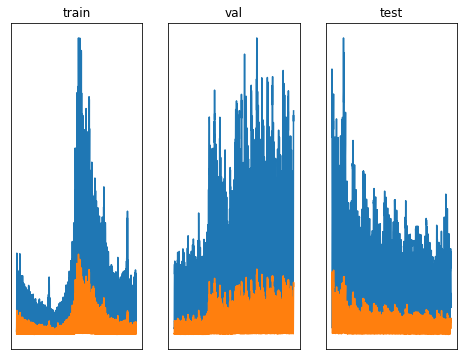

In [66]:
plt.subplot(1,3,1)
plt.plot(train_df_.pageimpression_oop)
plt.plot(train_df_.LOCO_OOP)
plt.xticks([])
plt.yticks([])
plt.title("train")
plt.subplot(1,3,2)
plt.plot(val_df_.pageimpression_oop)
plt.plot(val_df_.LOCO_OOP)
plt.xticks([])
plt.yticks([])
plt.title("val")
plt.subplot(1,3,3)
plt.plot(test_df_.pageimpression_oop)
plt.plot(test_df_.LOCO_OOP)
plt.xticks([])
plt.yticks([])
plt.title("test")
plt.show()

# Normalize the data

In [67]:
train_mean = train_df_.mean()
train_std = train_df_.std()

def normalize(x):
    return (x - train_mean) / train_std

train_df = normalize(train_df_)
val_df = normalize(val_df_)
test_df = normalize(test_df_)

In [68]:
train_df

,pageimpression_oop,LOCO_OOP,mo,tu,We,th,fr,sa,su,Year sin,Year cos,day sin,day cos
0,-0.842595,-0.447668,2.436821,-0.410340,-0.407589,-0.407339,-0.407339,-0.407339,-0.407339,0.034535,-1.455295,-0.000027,1.413853
1,-0.863749,-0.737570,2.436821,-0.410340,-0.407589,-0.407339,-0.407339,-0.407339,-0.407339,0.034535,-1.455295,0.366010,1.365670
2,-0.856364,-0.812660,2.436821,-0.410340,-0.407589,-0.407339,-0.407339,-0.407339,-0.407339,0.034535,-1.455295,0.707102,1.224404
3,-0.748216,-0.843551,2.436821,-0.410340,-0.407589,-0.407339,-0.407339,-0.407339,-0.407339,0.034535,-1.455295,1.000005,0.999684
4,-0.565591,-0.835472,2.436821,-0.410340,-0.407589,-0.407339,-0.407339,-0.407339,-0.407339,0.034535,-1.455295,1.224757,0.706822
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,0.067025,0.034235,-0.410340,2.436821,-0.407589,-0.407339,-0.407339,-0.407339,-0.407339,0.730424,1.279915,-1.000060,0.999684
13318,-0.346291,-0.209568,-0.410340,2.436821,-0.407589,-0.407339,-0.407339,-0.407339,-0.407339,0.730424,1.279915,-0.707157,1.224404
13319,-0.488360,-0.544619,-0.410340,2.436821,-0.407589,-0.407339,-0.407339,-0.407339,-0.407339,0.730424,1.279915,-0.366065,1.365670
13320,-0.694767,-0.608778,-0.410340,-0.410340,2.453266,-0.407339,-0.407339,-0.407339,-0.407339,0.754855,1.272718,-0.000027,1.413853


## Windowing

In [69]:
from window_helper import WindowGenerator

In [70]:
window_generator = WindowGenerator(train_df=train_df, val_df=val_df, test_df=test_df, input_width=7*24, label_width=1, shift=1, label_columns=['pageimpression_oop'])
window_generator

Total window size: 169
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167]
Label indices: [168]
Label column name(s): ['pageimpression_oop']

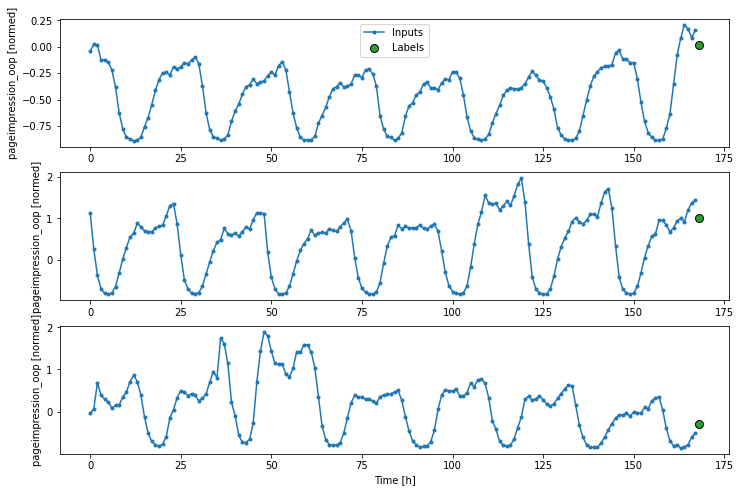

In [71]:
# show three samples from the window generator
window_generator.plot(plot_col='pageimpression_oop', max_subplots=3)

In [72]:
for example_inputs, example_labels in window_generator.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 168, 13)
Labels shape (batch, time, features): (32, 1, 1)


## Baseline

In [73]:
single_step_window = WindowGenerator(train_df=train_df, val_df=val_df, test_df=test_df,
    input_width=1, label_width=1, shift=1,
    label_columns=['pageimpression_oop'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['pageimpression_oop']

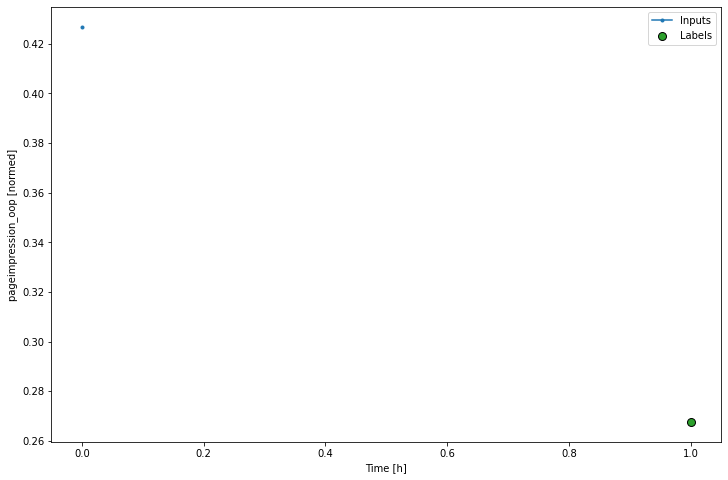

In [74]:
single_step_window.plot(plot_col='pageimpression_oop', max_subplots=1)

In [75]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [157]:
baseline = Baseline(label_index=column_indices['pageimpression_oop'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError(), tf.metrics.MeanAbsolutePercentageError()])

train_performance = {}
val_performance = {}
performance = {}
train_performance['Baseline'] = baseline.evaluate(single_step_window.train)
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

119/119 [==============================] - 0s 882us/step - loss: 0.1149 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 159.5072


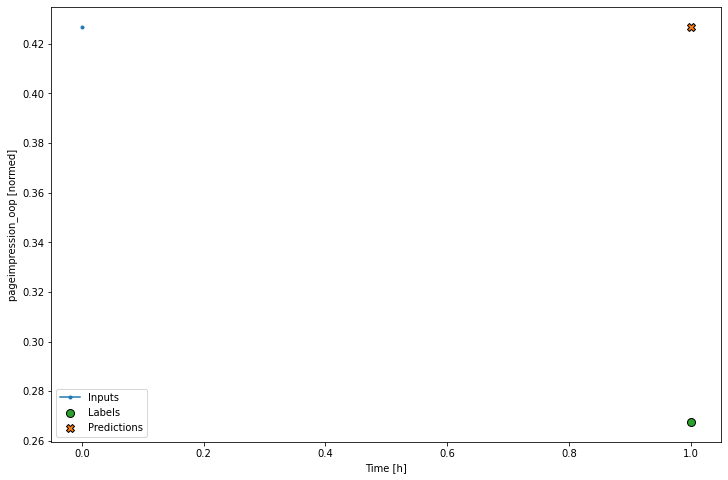

In [158]:
single_step_window.plot(plot_col='pageimpression_oop', model=baseline)

In [159]:
wide_window = WindowGenerator(train_df=train_df, val_df=val_df, test_df=test_df,
    input_width=24, label_width=24, shift=1,
    label_columns=['pageimpression_oop'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['pageimpression_oop']

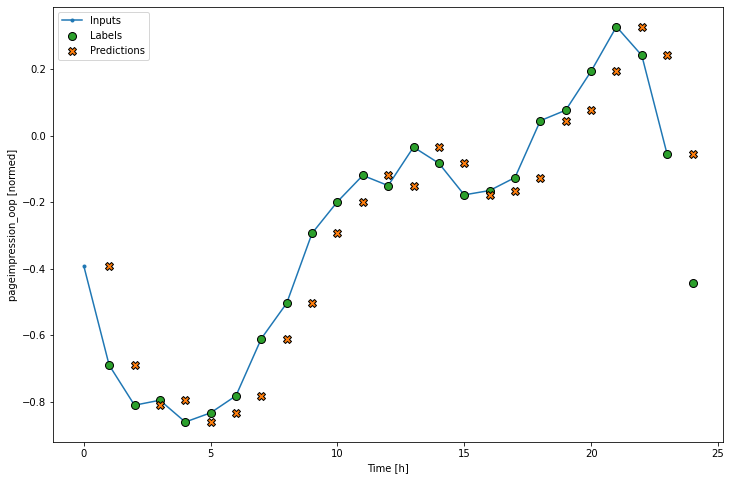

In [160]:
wide_window.plot(model=baseline, plot_col='pageimpression_oop', max_subplots=1)

## Linear Model

In [161]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [162]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 13)
Output shape: (32, 1, 1)


In [163]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(), tf.metrics.MeanAbsolutePercentageError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [164]:
history = compile_and_fit(linear, single_step_window)

train_performance['Linear'] = linear.evaluate(single_step_window.train)
val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
417/417 [==============================] - 1s 2ms/step - loss: 0.6654 - mean_absolute_error: 0.6194 - mean_absolute_percentage_error: 469.8761 - val_loss: 0.2457 - val_mean_absolute_error: 0.3781 - val_mean_absolute_percentage_error: 177.4497
Epoch 2/20
417/417 [==============================] - 1s 1ms/step - loss: 0.0991 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 188.5803 - val_loss: 0.0806 - val_mean_absolute_error: 0.1978 - val_mean_absolute_percentage_error: 124.1434
Epoch 3/20
417/417 [==============================] - 1s 1ms/step - loss: 0.0462 - mean_absolute_error: 0.1401 - mean_absolute_percentage_error: 118.6109 - val_loss: 0.0690 - val_mean_absolute_error: 0.1800 - val_mean_absolute_percentage_error: 112.9402
Epoch 4/20
417/417 [==============================] - 1s 1ms/step - loss: 0.0405 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 106.2575 - val_loss: 0.0663 - val_mean_absolute_error: 0.1750 - val_mean_absolute_percentage_

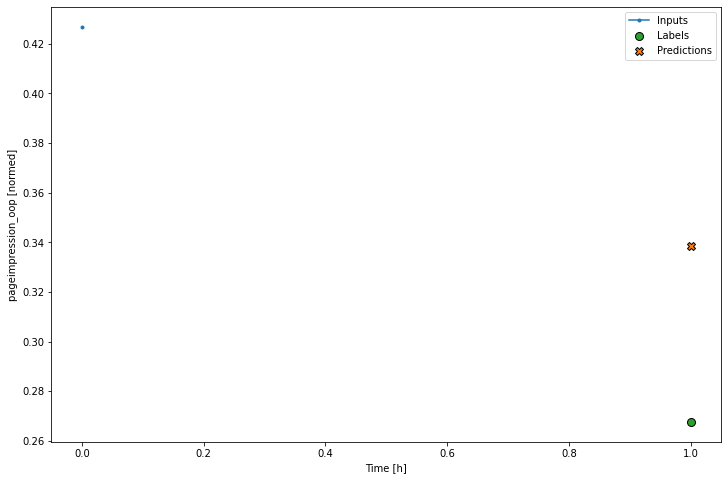

In [165]:
single_step_window.plot(plot_col='pageimpression_oop', model=linear)

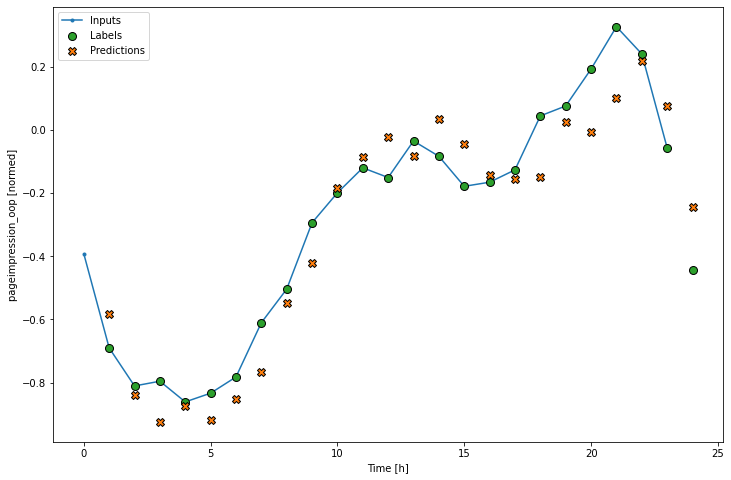

In [166]:
wide_window.plot(model=linear, plot_col='pageimpression_oop', max_subplots=1)

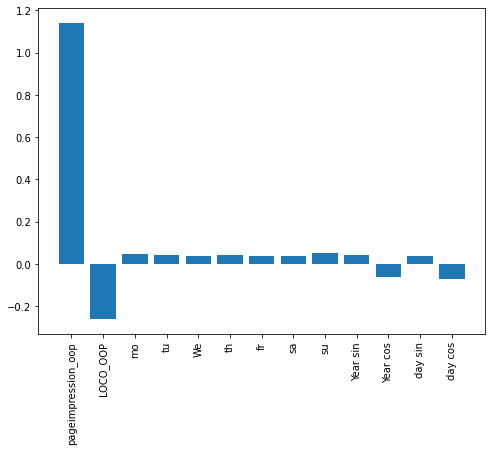

In [167]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## Linear on monthly window

In [168]:
monthly_window_generator = WindowGenerator(train_df=train_df, val_df=val_df, test_df=test_df, input_width=30*24, label_width=1, shift=1, label_columns=['pageimpression_oop'])
features, labels = monthly_window_generator.example
print(features.shape, labels.shape)

(32, 720, 13) (32, 1, 1)


In [169]:
monthly_linear = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Reshape([1, -1]),
])
print('Input shape:', monthly_window_generator.example[0].shape)
print('Label shape:', monthly_window_generator.example[1].shape)
print('Output shape:', monthly_linear(monthly_window_generator.example[0]).shape)

Input shape: (32, 720, 13)
Label shape: (32, 1, 1)
Output shape: (32, 1, 1)


In [170]:
history = compile_and_fit(monthly_linear, monthly_window_generator)

train_performance['Linear_monthly'] = linear.evaluate(monthly_window_generator.train)
val_performance['Linear_monthly'] = linear.evaluate(monthly_window_generator.val)
performance['Linear_monthly'] = linear.evaluate(monthly_window_generator.test, verbose=0)

Epoch 1/20
394/394 [==============================] - 1s 2ms/step - loss: 0.3154 - mean_absolute_error: 0.4065 - mean_absolute_percentage_error: 261.8875 - val_loss: 0.3772 - val_mean_absolute_error: 0.4954 - val_mean_absolute_percentage_error: 143.2129
Epoch 2/20
394/394 [==============================] - 1s 2ms/step - loss: 0.3998 - mean_absolute_error: 0.4807 - mean_absolute_percentage_error: 323.0120 - val_loss: 0.1784 - val_mean_absolute_error: 0.3363 - val_mean_absolute_percentage_error: 112.8138
Epoch 3/20
394/394 [==============================] - 1s 2ms/step - loss: 0.2640 - mean_absolute_error: 0.3933 - mean_absolute_percentage_error: 241.3464 - val_loss: 0.4611 - val_mean_absolute_error: 0.5729 - val_mean_absolute_percentage_error: 176.7825
Epoch 4/20
394/394 [==============================] - 1s 2ms/step - loss: 0.3051 - mean_absolute_error: 0.4213 - mean_absolute_percentage_error: 289.0024 - val_loss: 0.0879 - val_mean_absolute_error: 0.2236 - val_mean_absolute_percentage_

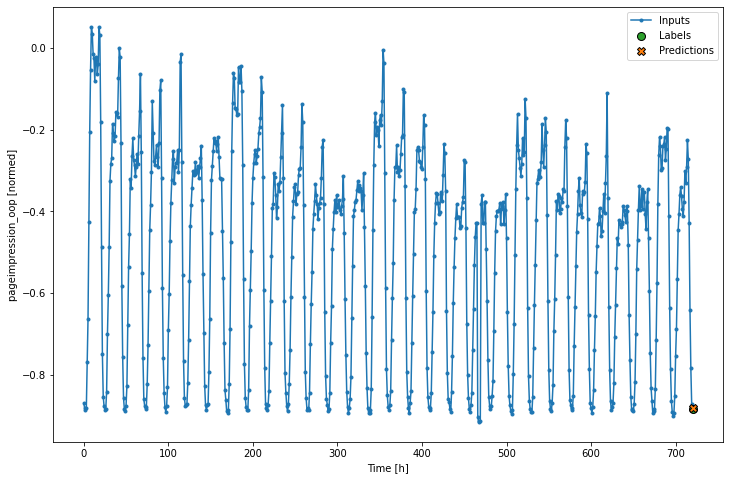

In [171]:
monthly_window_generator = WindowGenerator(train_df=train_df, val_df=val_df, test_df=test_df, input_width=30*24, label_width=1, shift=1, label_columns=['pageimpression_oop'])
monthly_window_generator.plot(model=monthly_linear, plot_col='pageimpression_oop', max_subplots=1)

## Monthly Dense

In [172]:
monthly_dense = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Reshape([1, -1]),
])
print('Input shape:', monthly_window_generator.example[0].shape)
print('Label shape:', monthly_window_generator.example[1].shape)
print('Output shape:', monthly_dense(monthly_window_generator.example[0]).shape)

history = compile_and_fit(monthly_dense, monthly_window_generator)

train_performance['Dense'] = monthly_dense.evaluate(monthly_window_generator.train)
val_performance['Dense'] = monthly_dense.evaluate(monthly_window_generator.val)
performance['Dense'] = monthly_dense.evaluate(monthly_window_generator.test, verbose=0)

Input shape: (32, 720, 13)
Label shape: (32, 1, 1)
Output shape: (32, 1, 1)
Epoch 1/20
394/394 [==============================] - 2s 5ms/step - loss: 1.1175 - mean_absolute_error: 0.7804 - mean_absolute_percentage_error: 543.0388 - val_loss: 0.7886 - val_mean_absolute_error: 0.6792 - val_mean_absolute_percentage_error: 246.4635
Epoch 2/20
394/394 [==============================] - 2s 5ms/step - loss: 0.2940 - mean_absolute_error: 0.4033 - mean_absolute_percentage_error: 278.2047 - val_loss: 0.3425 - val_mean_absolute_error: 0.4587 - val_mean_absolute_percentage_error: 120.9163
Epoch 3/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1779 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 201.1975 - val_loss: 0.2567 - val_mean_absolute_error: 0.3696 - val_mean_absolute_percentage_error: 92.6388
Epoch 4/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1729 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 224.6627 - val_los

## Simple RNN

In [173]:
simple_rnn = tf.keras.Sequential([
    #tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Reshape([1, -1]),
])
print('Input shape:', monthly_window_generator.example[0].shape)
print('Label shape:', monthly_window_generator.example[1].shape)
print('Output shape:', simple_rnn(monthly_window_generator.example[0]).shape)

history = compile_and_fit(simple_rnn, monthly_window_generator)

train_performance['SimpleRNN'] = simple_rnn.evaluate(monthly_window_generator.train)
val_performance['SimpleRNN'] = simple_rnn.evaluate(monthly_window_generator.val)
performance['SimpleRNN'] = simple_rnn.evaluate(monthly_window_generator.test, verbose=0)

Input shape: (32, 720, 13)
Label shape: (32, 1, 1)
Output shape: (32, 1, 1)
Epoch 1/20
394/394 [==============================] - 34s 85ms/step - loss: 0.1707 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 146.1519 - val_loss: 0.0522 - val_mean_absolute_error: 0.1638 - val_mean_absolute_percentage_error: 58.9009
Epoch 2/20
394/394 [==============================] - 33s 83ms/step - loss: 0.0240 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 63.2557 - val_loss: 0.0303 - val_mean_absolute_error: 0.1241 - val_mean_absolute_percentage_error: 43.4158
Epoch 3/20
394/394 [==============================] - 32s 82ms/step - loss: 0.0155 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 56.0459 - val_loss: 0.0276 - val_mean_absolute_error: 0.1168 - val_mean_absolute_percentage_error: 36.6676
Epoch 4/20
394/394 [==============================] - 36s 91ms/step - loss: 0.0126 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 50.0786 - val_

# LSTM

In [174]:
lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64),#, return_sequences=True),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Reshape([1, -1]),
])
print('Input shape:', monthly_window_generator.example[0].shape)
print('Label shape:', monthly_window_generator.example[1].shape)
print('Output shape:', lstm(monthly_window_generator.example[0]).shape)

history = compile_and_fit(lstm, monthly_window_generator)

train_performance['LSTM'] = lstm.evaluate(monthly_window_generator.train)
val_performance['LSTM'] = lstm.evaluate(monthly_window_generator.val)
performance['LSTM'] = lstm.evaluate(monthly_window_generator.test, verbose=0)

Input shape: (32, 720, 13)
Label shape: (32, 1, 1)
Output shape: (32, 1, 1)
Epoch 1/20
394/394 [==============================] - 73s 183ms/step - loss: 0.1335 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 115.9900 - val_loss: 0.0523 - val_mean_absolute_error: 0.1627 - val_mean_absolute_percentage_error: 45.6458
Epoch 2/20
394/394 [==============================] - 75s 190ms/step - loss: 0.0230 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 56.5056 - val_loss: 0.0400 - val_mean_absolute_error: 0.1388 - val_mean_absolute_percentage_error: 43.9493
Epoch 3/20
394/394 [==============================] - 74s 188ms/step - loss: 0.0154 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 46.2910 - val_loss: 0.0315 - val_mean_absolute_error: 0.1223 - val_mean_absolute_percentage_error: 37.6862
Epoch 4/20
367/394 [==========================>...] - ETA: 4s - loss: 0.0121 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 45.3994

KeyboardInterrupt: 

# ConvNet

In [175]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(3,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=2),
])

In [176]:
history = compile_and_fit(conv_model, monthly_window_generator)

IPython.display.clear_output()
train_performance['Conv'] = conv_model.evaluate(monthly_window_generator.train)
val_performance['Conv'] = conv_model.evaluate(monthly_window_generator.val)
performance['Conv'] = conv_model.evaluate(monthly_window_generator.test, verbose=0)

97/97 [==============================] - 1s 6ms/step - loss: 1.5002 - mean_absolute_error: 0.9714 - mean_absolute_percentage_error: 319.8271


## Evaluation

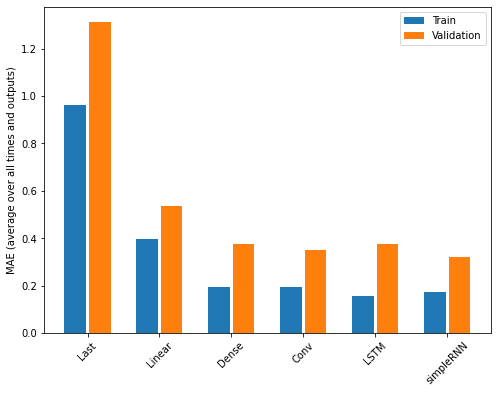

In [177]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = multi_dense_model.metrics_names.index('mean_absolute_error')
train_mae = [v[metric_index] for v in multi_train_performance.values()]
val_mae = [v[metric_index] for v in multi_val_performance.values()]

plt.bar(x - 0.17, train_mae, width, label='Train')
plt.bar(x + 0.17, val_mae, width, label='Validation')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

# Muli-step predictions

## Daily predictions with 1 week of input data

In [112]:
OUT_STEPS = 24

multi_window = WindowGenerator(train_df=train_df, val_df=val_df, test_df=test_df, input_width=24*7, label_width=OUT_STEPS, shift=OUT_STEPS, label_columns=['pageimpression_oop'])

multi_window

Total window size: 192
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167]
Label indices: [168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191]
Label column name(s): ['pageimpression_oop']

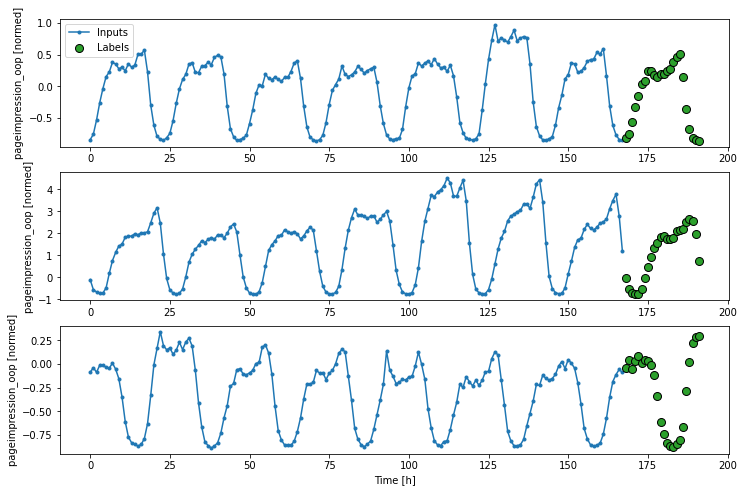

In [113]:
multi_window.plot(plot_col='pageimpression_oop', max_subplots=3)

113/113 [==============================] - 0s 961us/step - loss: 2.3839 - mean_absolute_error: 1.2239


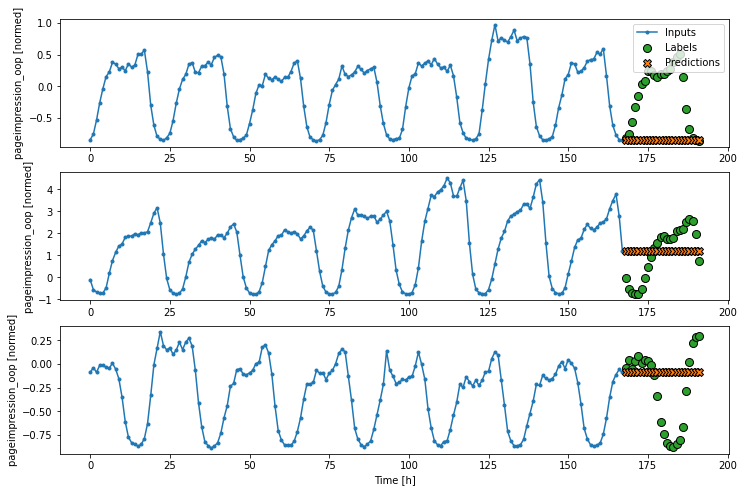

In [117]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)

multi_window.plot(plot_col='pageimpression_oop', model=last_baseline, max_subplots=3)


113/113 [==============================] - 0s 1ms/step - loss: 0.3931 - mean_absolute_error: 0.4585 - mean_absolute_percentage_error: 178.9812


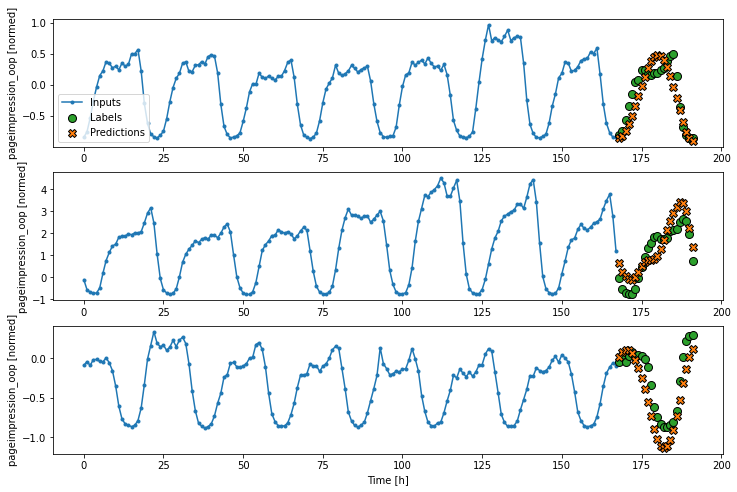

In [121]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(plot_col='pageimpression_oop', model=multi_linear_model, max_subplots=3)

113/113 [==============================] - 0s 1ms/step - loss: 0.1538 - mean_absolute_error: 0.2790 - mean_absolute_percentage_error: 124.3877


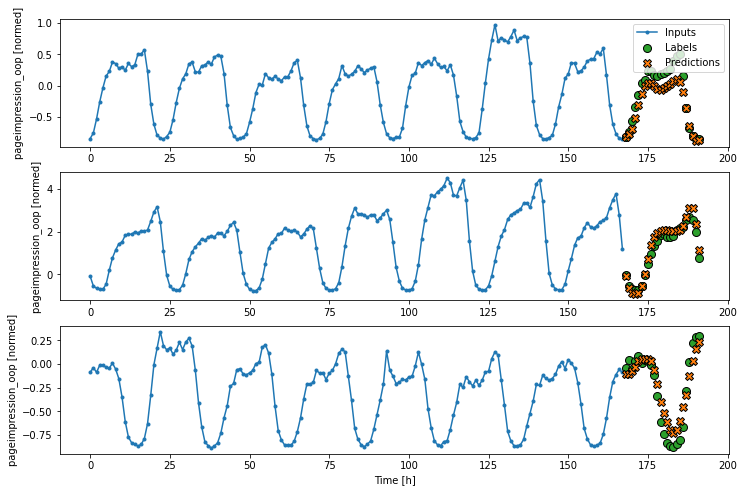

In [124]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(plot_col='pageimpression_oop', model=multi_dense_model, max_subplots=3)

113/113 [==============================] - 0s 1ms/step - loss: 0.1283 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 110.0122


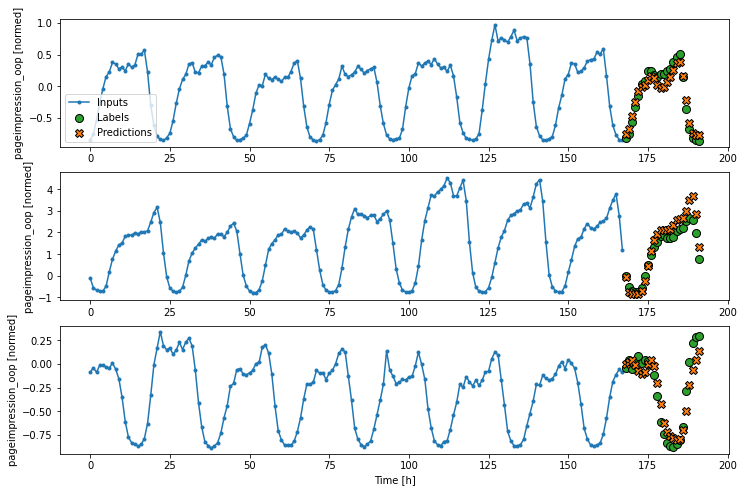

In [125]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(plot_col='pageimpression_oop', model=multi_conv_model, max_subplots=3)

113/113 [==============================] - 1s 8ms/step - loss: 0.0990 - mean_absolute_error: 0.2035 - mean_absolute_percentage_error: 72.2917


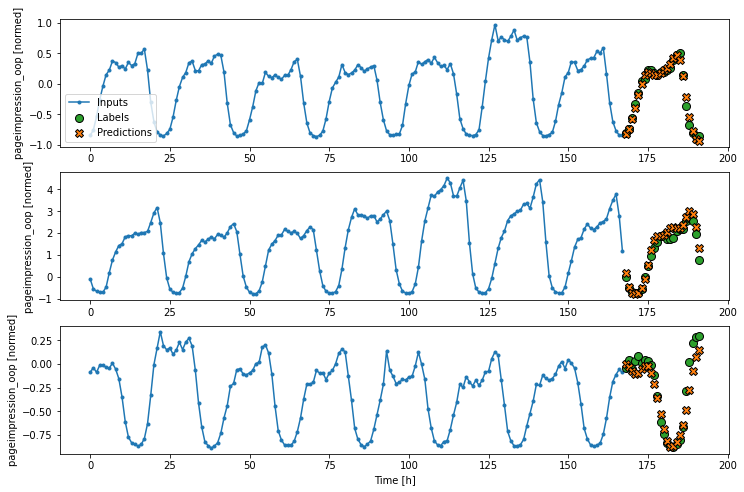

In [126]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(plot_col='pageimpression_oop', model=multi_lstm_model, max_subplots=3)

113/113 [==============================] - 1s 7ms/step - loss: 0.0961 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 88.1046


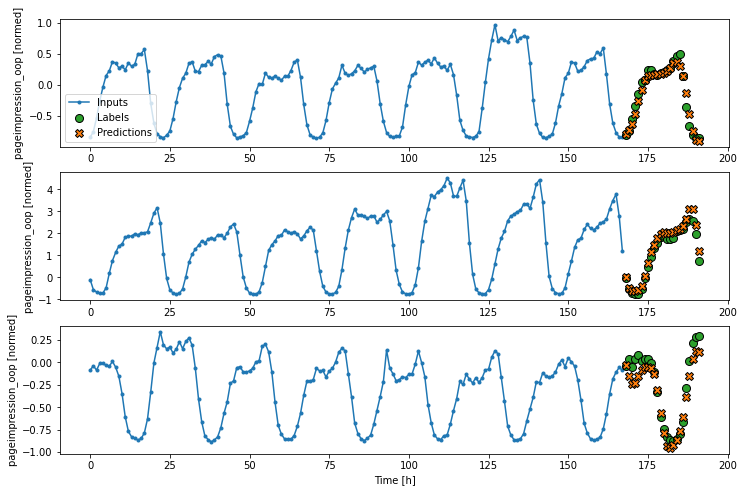

In [128]:
multi_simpleRNN_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.SimpleRNN(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_simpleRNN_model, multi_window)

IPython.display.clear_output()

multi_val_performance['simpleRNN'] = multi_simpleRNN_model.evaluate(multi_window.val)
multi_performance['simpleRNN'] = multi_simpleRNN_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(plot_col='pageimpression_oop', model=multi_simpleRNN_model, max_subplots=3)

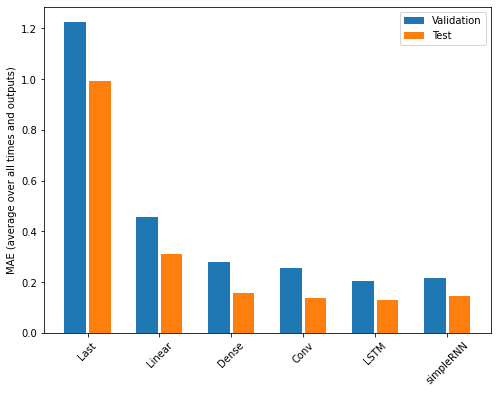

In [130]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = multi_lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

## Weekly prediction with 1 month of input data

In [131]:
OUT_STEPS = 24*7
IN_STEPS = 24*30

multi_window = WindowGenerator(train_df=train_df, val_df=val_df, test_df=test_df, input_width=IN_STEPS, label_width=OUT_STEPS, shift=OUT_STEPS, label_columns=['pageimpression_oop'])

multi_window

Total window size: 888
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

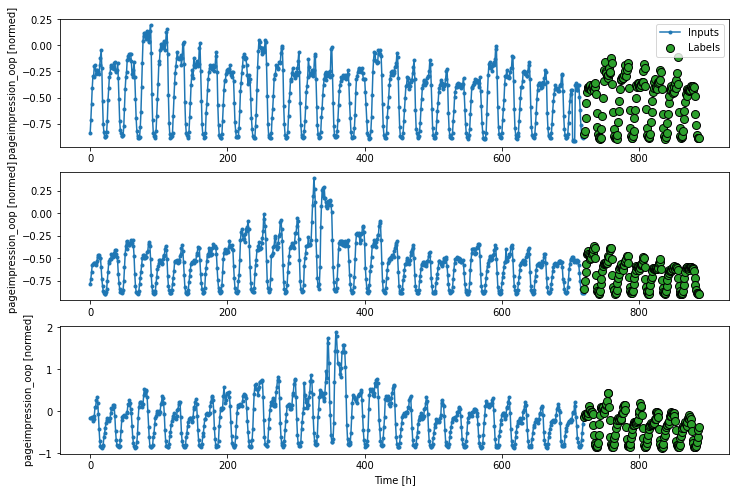

In [132]:
multi_window.plot(plot_col='pageimpression_oop', max_subplots=3)

92/92 [==============================] - 0s 2ms/step - loss: 2.6360 - mean_absolute_error: 1.3109


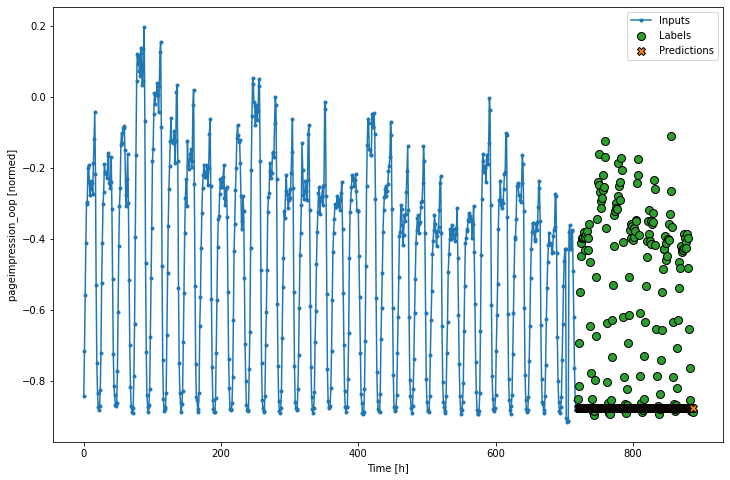

In [147]:
last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_train_performance = {}
multi_val_performance = {}
multi_performance = {}

multi_train_performance['Last'] = last_baseline.evaluate(multi_window.train)
multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)

multi_window.plot(plot_col='pageimpression_oop', model=last_baseline)

92/92 [==============================] - 0s 2ms/step - loss: 0.4825 - mean_absolute_error: 0.5372 - mean_absolute_percentage_error: 132.9742


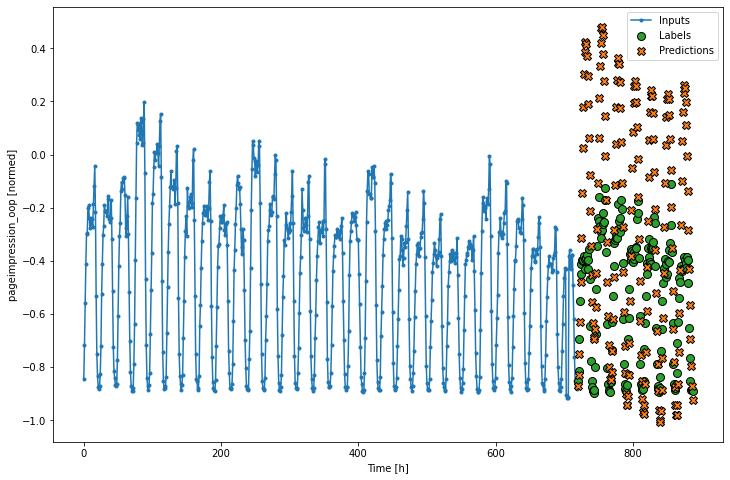

In [148]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_train_performance['Linear'] = multi_linear_model.evaluate(multi_window.train)
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(plot_col='pageimpression_oop', model=multi_linear_model, max_subplots=1)

92/92 [==============================] - 0s 4ms/step - loss: 0.2445 - mean_absolute_error: 0.3737 - mean_absolute_percentage_error: 104.6950


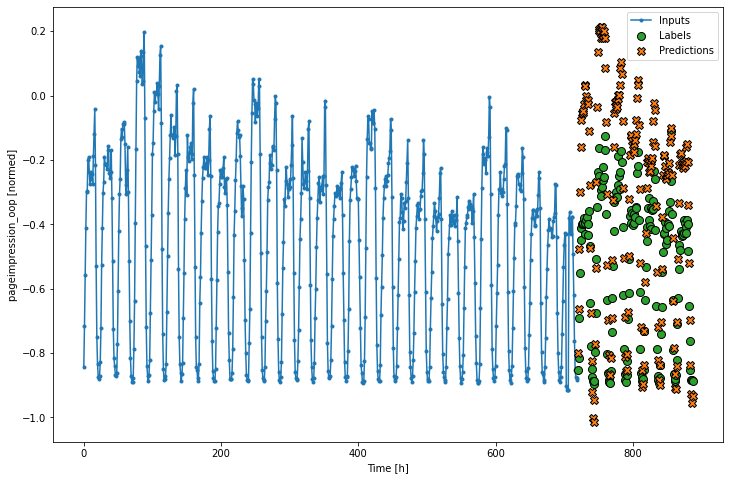

In [152]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_train_performance['Dense'] = multi_dense_model.evaluate(multi_window.train)
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(plot_col='pageimpression_oop', model=multi_dense_model)

92/92 [==============================] - 0s 4ms/step - loss: 0.2112 - mean_absolute_error: 0.3467 - mean_absolute_percentage_error: 97.1205


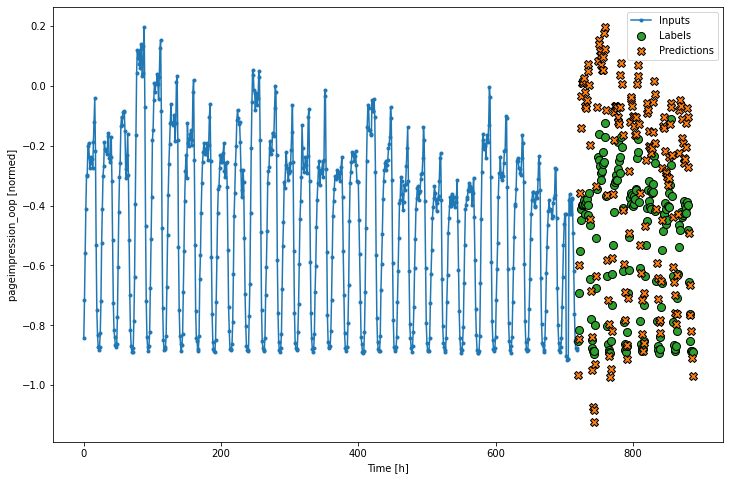

In [240]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()
multi_train_performance['Conv'] = multi_conv_model.evaluate(multi_window.train)
multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(plot_col='pageimpression_oop', model=multi_conv_model)

92/92 [==============================] - 3s 33ms/step - loss: 0.2559 - mean_absolute_error: 0.3773 - mean_absolute_percentage_error: 95.8304


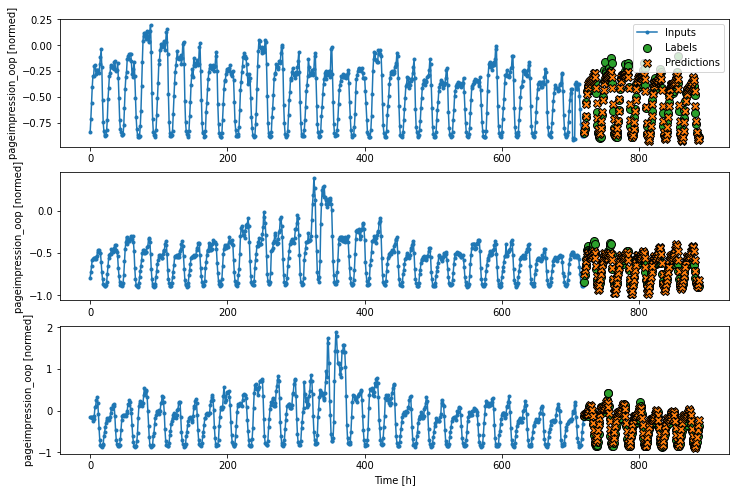

In [154]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()
multi_train_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.train)
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(plot_col='pageimpression_oop', model=multi_lstm_model)

92/92 [==============================] - 2s 21ms/step - loss: 0.1904 - mean_absolute_error: 0.3203 - mean_absolute_percentage_error: 79.0062


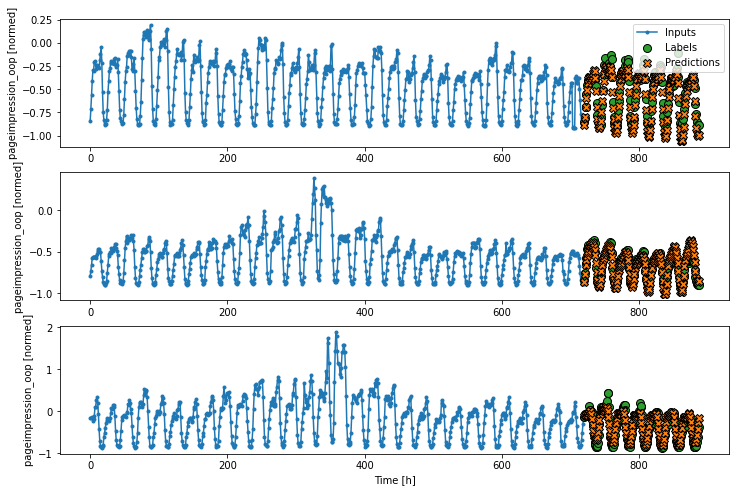

In [155]:
multi_simpleRNN_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.SimpleRNN(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_simpleRNN_model, multi_window)

IPython.display.clear_output()
multi_train_performance['simpleRNN'] = multi_simpleRNN_model.evaluate(multi_window.train)
multi_val_performance['simpleRNN'] = multi_simpleRNN_model.evaluate(multi_window.val)
multi_performance['simpleRNN'] = multi_simpleRNN_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(plot_col='pageimpression_oop', model=multi_simpleRNN_model)

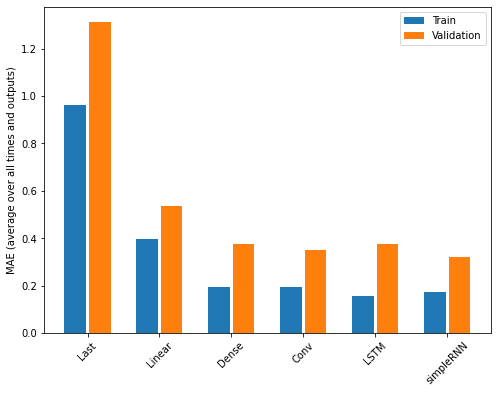

In [156]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = multi_dense_model.metrics_names.index('mean_absolute_error')
train_mae = [v[metric_index] for v in multi_train_performance.values()]
val_mae = [v[metric_index] for v in multi_val_performance.values()]

plt.bar(x - 0.17, train_mae, width, label='Train')
plt.bar(x + 0.17, val_mae, width, label='Validation')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

# One week Prediction with Scaling back

In [247]:
from sklearn.metrics import mean_absolute_percentage_error

In [178]:
predict_df = normalize(test_df_.iloc[:30*24])
actual_df = test_df_.iloc[30*24:37*24].pageimpression_oop

In [190]:
predict_np = predict_df.to_numpy()
predict_np = np.expand_dims(predict_np, axis=0)
predict_np.shape

(1, 720, 13)

In [179]:
predict_df.head()

,pageimpression_oop,LOCO_OOP,mo,tu,We,th,fr,sa,su,Year sin,Year cos,day sin,day cos
17128,2.404348,2.422840,-0.41034,-0.41034,-0.407589,-0.407339,-0.407339,-0.407339,2.454775,0.467638,-1.469438,-1.224812,-0.707239
17129,2.466559,2.539752,-0.41034,-0.41034,-0.407589,-0.407339,-0.407339,-0.407339,2.454775,0.467638,-1.469438,-1.366097,-0.366195
17130,3.206321,2.182364,-0.41034,-0.41034,-0.407589,-0.407339,-0.407339,-0.407339,2.454775,0.467638,-1.469438,-1.414287,-0.000209
17131,3.542531,2.000343,-0.41034,-0.41034,-0.407589,-0.407339,-0.407339,-0.407339,2.454775,0.467638,-1.469438,-1.366097,0.365777
17132,2.662201,2.831080,-0.41034,-0.41034,-0.407589,-0.407339,-0.407339,-0.407339,2.454775,0.467638,-1.469438,-1.224812,0.706822


In [238]:
prediction_np = multi_conv_model.predict(predict_np)
prediction_np

array([[[0.9590898 , 0.9590898 , 0.9590898 , ..., 0.9590898 ,
         0.9590898 , 0.9590898 ],
        [1.0166557 , 1.0166557 , 1.0166557 , ..., 1.0166557 ,
         1.0166557 , 1.0166557 ],
        [0.9840898 , 0.9840898 , 0.9840898 , ..., 0.9840898 ,
         0.9840898 , 0.9840898 ],
        ...,
        [0.64978606, 0.64978606, 0.64978606, ..., 0.64978606,
         0.64978606, 0.64978606],
        [0.7099245 , 0.7099245 , 0.7099245 , ..., 0.7099245 ,
         0.7099245 , 0.7099245 ],
        [0.7916951 , 0.7916951 , 0.7916951 , ..., 0.7916951 ,
         0.7916951 , 0.7916951 ]]], dtype=float32)

In [219]:
def scale_back(x):
    return x * train_std[0] + train_mean[0]

In [227]:
preds = scale_back(prediction_np[0,:,0])

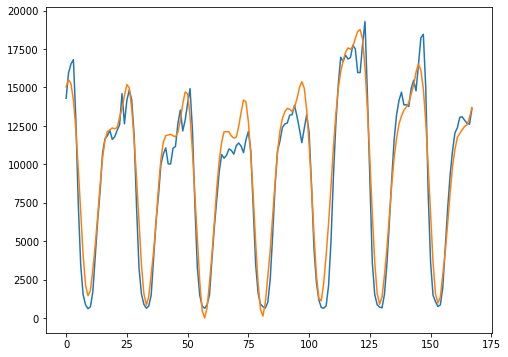

In [229]:
plt.plot(actual_df.to_numpy())
plt.plot(preds)

In [231]:
mean_absolute_percentage_error(actual_df.to_numpy(), preds)

0.3061772257266299

In [234]:
weekly_total_actual = np.sum(actual_df.to_numpy())
weekly_total_predicted = np.sum(preds)

In [237]:
mean_absolute_percentage_error([weekly_total_actual], [weekly_total_predicted])

0.05968518264346488